In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv', index_col="PassengerId")
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('./data/test.csv', index_col="PassengerId")
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [5]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Preprocessing
## fare

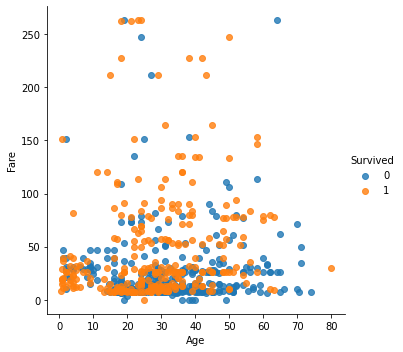

In [6]:
low_fare = train[train["Fare"] < 500]
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

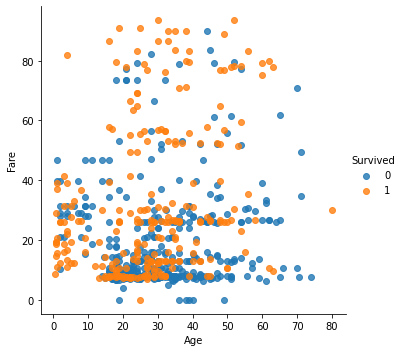

In [7]:
low_low_fare = train[train["Fare"] < 100]
sns.lmplot(data=low_low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

### missing values

In [8]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [9]:
train["Fare_filled"] = train["Fare"]
print(train.shape)

test["Fare_filled"] = test["Fare"]
print(test.shape)

(891, 12)
(418, 11)


In [10]:
test.loc[test["Fare"].isnull(), "Fare_filled"] = 0
test.loc[test["Fare"].isnull(), ["Fare", "Fare_filled"]]

,Fare,Fare_filled
PassengerId,,
1044,NaN,0.0


## embarked

In [11]:
train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"
print(train.shape)

train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(891, 15)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [12]:
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"
print(test.shape)

test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(418, 14)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


## age

In [13]:
# age hurts the predictions if used raw
# FE process below is from David's nb

train["under15"] = train["Age"] < 15
print(train.shape)

test["under15"] = test["Age"] < 15
print(test.shape)

test[["Age", "under15"]].head(10)

(891, 16)
(418, 15)


,Age,under15
PassengerId,,
892,34.5,False
893,47.0,False
894,62.0,False
895,27.0,False
896,22.0,False
897,14.0,True
898,30.0,False
899,26.0,False
900,18.0,False


## family size

In [14]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
print(train.shape)
train[["SibSp", "Parch", "FamilySize"]].head()

(891, 17)


,SibSp,Parch,FamilySize
PassengerId,,,
1,1,0,2
2,1,0,2
3,0,0,1
4,1,0,2
5,0,0,1


In [15]:
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
print(test.shape)

(418, 16)


In [16]:
train["Single"] = train["FamilySize"] == 1
train["Average"] = (train["FamilySize"] > 1) & (train["FamilySize"] < 5)
train["Big"] = train["FamilySize"] >= 5
print(train.shape)

train[["FamilySize", "Single", "Average", "Big"]].head(10)

(891, 20)


,FamilySize,Single,Average,Big
PassengerId,,,,
1,2,False,True,False
2,2,False,True,False
3,1,True,False,False
4,2,False,True,False
5,1,True,False,False
6,1,True,False,False
7,1,True,False,False
8,5,False,False,True
9,3,False,True,False


In [17]:
test["Single"] = test["FamilySize"] == 1
test["Average"] = (test["FamilySize"] > 1) & (test["FamilySize"] < 5)
test["Big"] = test["FamilySize"] >= 5
print(test.shape)
test[["FamilySize", "Single", "Average", "Big"]].head()

(418, 19)


,FamilySize,Single,Average,Big
PassengerId,,,,
892,1,True,False,False
893,2,False,True,False
894,1,True,False,False
895,1,True,False,False
896,3,False,True,False


## sex

In [18]:
train.loc[train["Sex"] == "male", "Sex_encoded"] = 0
train.loc[train["Sex"] == "female", "Sex_encoded"] = 1
print(train.shape)
train[["Sex", "Sex_encoded"]].head()

(891, 21)


,Sex,Sex_encoded
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [19]:
test.loc[test["Sex"] == "male", "Sex_encoded"] = 0
test.loc[test["Sex"] == "female", "Sex_encoded"] = 1
print(test.shape)
test[["Sex", "Sex_encoded"]].head()

(418, 20)


,Sex,Sex_encoded
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


## name

In [20]:
# process below is from David's nb

def get_title(name):
    return name.split(", ")[1].split('. ')[0]

train["Name"].apply(get_title).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [21]:
train.loc[train["Name"].str.contains("Mr"), "Title"] = "Mr"
train.loc[train["Name"].str.contains("Miss"), "Title"] = "Miss"
train.loc[train["Name"].str.contains("Mrs"), "Title"] = "Mrs"
train.loc[train["Name"].str.contains("Master"), "Title"] = "Master"
print(train.shape)
train[["Name", "Title"]].head(10)

(891, 22)


,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
6,"Moran, Mr. James",Mr
7,"McCarthy, Mr. Timothy J",Mr
8,"Palsson, Master. Gosta Leonard",Master
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs


In [22]:
pd.pivot_table(train, index="Title", values="Survived")

,Survived
Title,
Master,0.575000
Miss,0.700000
Mr,0.158301
Mrs,0.790698


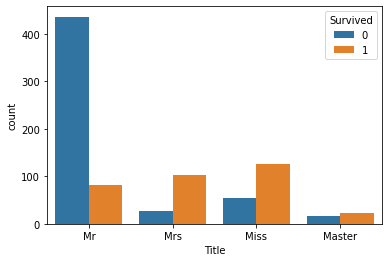

In [23]:
sns.countplot(data=train, x="Title", hue="Survived")

In [24]:
train["Master"] = train["Name"].str.contains("Master")
print(train.shape)
train[["Name", "Master"]].head(10)

(891, 23)


,Name,Master
PassengerId,,
1,"Braund, Mr. Owen Harris",False
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False
3,"Heikkinen, Miss. Laina",False
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False
5,"Allen, Mr. William Henry",False
6,"Moran, Mr. James",False
7,"McCarthy, Mr. Timothy J",False
8,"Palsson, Master. Gosta Leonard",True
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",False


In [25]:
test["Master"] = test["Name"].str.contains("Master")
print(test.shape)
test[["Name", "Master"]].head(10)

(418, 21)


,Name,Master
PassengerId,,
892,"Kelly, Mr. James",False
893,"Wilkes, Mrs. James (Ellen Needs)",False
894,"Myles, Mr. Thomas Francis",False
895,"Wirz, Mr. Albert",False
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False
897,"Svensson, Mr. Johan Cervin",False
898,"Connolly, Miss. Kate",False
899,"Caldwell, Mr. Albert Francis",False
900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",False


# Training 

In [26]:
features = ["Pclass", "Sex_encoded", "Fare_filled",
                 "Embarked_C", "Embarked_S", "Embarked_Q",
                 "under15", "Single", "Average", "Big", "Master"]
features

['Pclass',
 'Sex_encoded',
 'Fare_filled',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'under15',
 'Single',
 'Average',
 'Big',
 'Master']

In [27]:
label = "Survived"
label

'Survived'

In [28]:
X_train = train[features]
print(X_train.shape)

X_train.head()

(891, 11)


,Pclass,Sex_encoded,Fare_filled,Embarked_C,Embarked_S,Embarked_Q,under15,Single,Average,Big,Master
PassengerId,,,,,,,,,,,
1,3,0.0,7.2500,False,True,False,False,False,True,False,False
2,1,1.0,71.2833,True,False,False,False,False,True,False,False
3,3,1.0,7.9250,False,True,False,False,True,False,False,False
4,1,1.0,53.1000,False,True,False,False,False,True,False,False
5,3,0.0,8.0500,False,True,False,False,True,False,False,False


In [29]:
X_test = test[features]
print(X_test.shape)

X_test.head()

(418, 11)


,Pclass,Sex_encoded,Fare_filled,Embarked_C,Embarked_S,Embarked_Q,under15,Single,Average,Big,Master
PassengerId,,,,,,,,,,,
892,3,0.0,7.8292,False,False,True,False,True,False,False,False
893,3,1.0,7.0000,False,True,False,False,False,True,False,False
894,2,0.0,9.6875,False,False,True,False,True,False,False,False
895,3,0.0,8.6625,False,True,False,False,True,False,False,False
896,3,1.0,12.2875,False,True,False,False,False,True,False,False


In [30]:
y_train = train[label]
print(y_train.shape)

y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10, random_state=71)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=71, splitter='best')

In [32]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=71, splitter='best')

In [33]:
predictions = model.predict(X_test)
print(predictions.shape)

predictions[0:10]

(418,)


array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [34]:
submission = pd.read_csv("./data/gender_submission.csv", index_col="PassengerId")
print(submission.shape)

submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [35]:
submission["Survived"] = predictions
print(submission.shape)

submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [36]:
submission.to_csv("./submission_.csv")